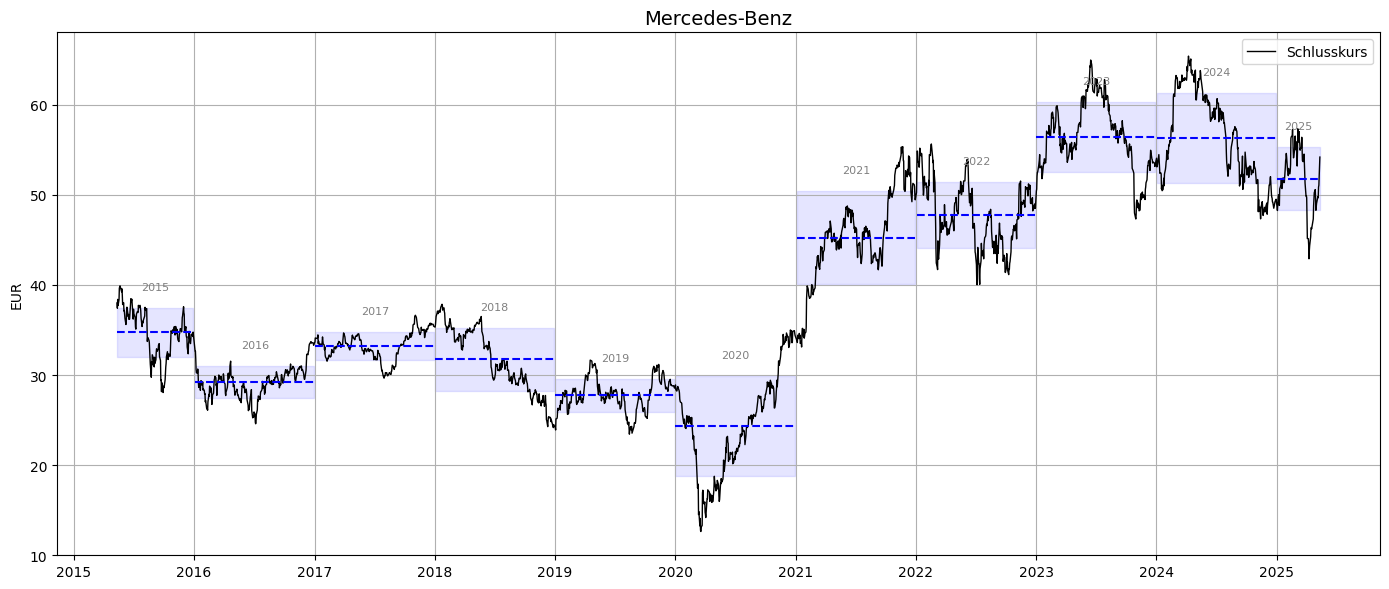

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
import numpy as np


# Daten laden

ticker = yf.Ticker("MBG.DE")
df = ticker.history(period="10y")
df = df.dropna(subset=['Close'])
df.index = pd.to_datetime(df.index)
df['Year'] = df.index.year
y = df['Close'].dropna()

# Zeitreihenplot
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, df['Close'], label="Schlusskurs", color='black', linewidth=1)

# Jahresstatistiken berechnen
grouped = df.groupby('Year')
for year, group in grouped:
    mean = group['Close'].mean()
    std = group['Close'].std()
    start, end = group.index.min(), group.index.max()
    
    # Horizontale Linie für Mittelwert
    ax.hlines(mean, xmin=start, xmax=end, color='blue', linestyle='--', linewidth=1.5)
    
    # Schattierter Bereich für ±1 Standardabweichung
    ax.fill_between(group.index, mean - std, mean + std, color='blue', alpha=0.1)
    
    # Optional: Text oder Marker
    ax.text(group.index[int(len(group)/2)], mean + std + 2, f'{year}', ha='center', fontsize=8, color='gray')

# Formatierungen
ax.set_title("Mercedes-Benz", fontsize=14)
ax.set_ylabel("EUR")
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Jahresstatistiken berechnen
yearly_stats = df.groupby('Year')['Close'].agg(
    Mittelwert='mean',
    Varianz='var',
    Standardabweichung='std'
)

# Optional: auf zwei Nachkommastellen runden
yearly_stats = yearly_stats.round(2)

# Tabelle anzeigen
# LaTeX-Tabelle
#print(yearly_stats.to_latex(index=True, caption='Jährliche Statistik der Schlusskurse für MBG.DE', label='tab:jahresstats'))
print(yearly_stats)


      Mittelwert  Varianz  Standardabweichung
Year                                         
2015       34.73     7.23                2.69
2016       29.19     3.14                1.77
2017       33.24     2.37                1.54
2018       31.73    12.55                3.54
2019       27.77     3.34                1.83
2020       24.36    31.08                5.57
2021       45.25    26.35                5.13
2022       47.75    13.41                3.66
2023       56.45    15.28                3.91
2024       56.35    24.81                4.98
2025       51.78    12.25                3.50


In [26]:
p_value = adfuller(y)[1]
print(p_value)
differentiation_order = 0
while p_value > 0.05:  # Solange die Zeitreihe nicht stationär ist
    # Erste Differenzierung durchführen
    y = y.diff().dropna()
    differentiation_order += 1
    p_value= adfuller(y)[1]
    print(f"{differentiation_order}: {p_value} ")



0.6429126924107448
1: 0.0 


c:\Users\nicla\Documents\BBA Semester 6\SPBA\Menden\Repository\Zeitreihenanalyse-1\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\nicla\Documents\BBA Semester 6\SPBA\Menden\Repository\Zeitreihenanalyse-1\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


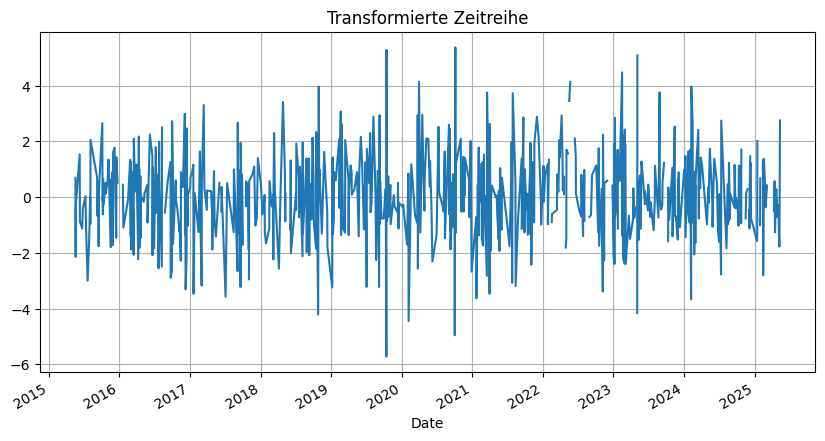

In [27]:
# Beispiel: Log-Transformation + Differenzierung
y_log = np.log(y)
y_stationary = y_log.diff().dropna()

# Plot der transformierten Zeitreihe
y_stationary.plot(title='Transformierte Zeitreihe', figsize=(10, 5))
plt.grid(True)
plt.show()

In [ ]:
#TODO Daten in pands umwandeln, in Datetime wandeln und einsehen woran die lücke liegt in 2022, log nah 0? 